# Задача 1

Воспользуйтесь API-интерфейсом для загрузки информации о фильмах из серии «Звёздные войны».

    Загрузите информацию о персонажах с индексами 1, 2, 3.
    Прочитайте JSON, для каждого значения вида https://swapi.dev/api/films/2/ запросите новый объект и замените эту строку на полученный объект.
    Сохраните файл в формате YAML.

In [2]:
import os
import random
import string
import glob

def make_file(path):
    content = []
    for _ in range(random.randint(5, 10)):
        line_length = random.randint(10, 20)
        content.append(''.join(random.choices(string.ascii_letters, k=line_length)))
    content = '\n'.join(content)
    with open(path, 'w') as fl:
        fl.write(content)

def create_dir_files(path):
    folder_names = [f'folder_{i}' for i in range(1, 4)]
    file_names = [f'file_{i}.{ext}' for ext in ['txt', 'log'] for i in range(1, 5)]

    for folder in folder_names:
        folder_path = os.path.join(path, folder)
        if not os.path.exists(folder_path):
            os.makedirs(folder_path)
            for file_name in file_names:
                file_path = os.path.join(folder_path, file_name)
                make_file(file_path)

    for file_name in file_names:
        file_path = os.path.join(path, file_name)
        make_file(file_path)

main_path = os.path.abspath('./main')
create_dir_files(main_path)

print("=" * 50)
print("1. Содержимое через os.walk:")

for root, dirs, files in os.walk(main_path):
    level = root.replace(main_path, '').count(os.sep)
    indent = ' ' * 2 * level
    print(f"{indent}[{os.path.basename(root)}]")
    for file in files:
        print(f"{indent}  {file}")

print("=" * 50)
print("2. Содержимое через glob:")

all_items = glob.glob(os.path.join(main_path, "**", "*"), recursive=True)
for item in sorted(all_items):
    rel_path = os.path.relpath(item, main_path)
    if os.path.isdir(item):
        print(f"[{rel_path}]")
    else:
        print(f"  {os.path.basename(item)}")

print("=" * 50)
print("3. Файлы по типам:")

print("TXT файлы:")
for file_path in glob.glob(os.path.join(main_path, "**", "*.txt"), recursive=True):
    print(f"  {os.path.relpath(file_path, main_path)}")

print("LOG файлы:")
for file_path in glob.glob(os.path.join(main_path, "**", "*.log"), recursive=True):
    print(f"  {os.path.relpath(file_path, main_path)}")

1. Содержимое через os.walk:
[main]
  file_1.log
  file_1.txt
  file_2.txt
  file_4.log
  file_3.log
  file_3.txt
  file_4.txt
  file_2.log
  [folder_3]
    file_1.log
    file_1.txt
    file_2.txt
    file_4.log
    file_3.log
    file_3.txt
    file_4.txt
    file_2.log
  [folder_2]
    file_1.log
    file_1.txt
    file_2.txt
    file_4.log
    file_3.log
    file_3.txt
    file_4.txt
    file_2.log
  [folder_1]
    file_1.log
    file_1.txt
    file_2.txt
    file_4.log
    file_3.log
    file_3.txt
    file_4.txt
    file_2.log
2. Содержимое через glob:
  file_1.log
  file_1.txt
  file_2.log
  file_2.txt
  file_3.log
  file_3.txt
  file_4.log
  file_4.txt
[folder_1]
  file_1.log
  file_1.txt
  file_2.log
  file_2.txt
  file_3.log
  file_3.txt
  file_4.log
  file_4.txt
[folder_2]
  file_1.log
  file_1.txt
  file_2.log
  file_2.txt
  file_3.log
  file_3.txt
  file_4.log
  file_4.txt
[folder_3]
  file_1.log
  file_1.txt
  file_2.log
  file_2.txt
  file_3.log
  file_3.txt
  file_4.log

# Задача 2

Используя результаты и код из предыдущего задания, посчитайте количество файлов, строк в файлах и общее число символов во всех файлах — отдельно в TXT и отдельно в log.

In [9]:
def count_file_stats(file_path):
    with open(file_path, 'r') as file:
        content = file.read()
        lines = len(content.split('\n'))
        chars = len(content)
        return lines, chars

def analyze_files(main_path):
    # TXT файлы
    print("TXT ФАЙЛЫ:")
    txt_files = glob.glob(os.path.join(main_path, "**", "*.txt"), recursive=True)
    txt_stats = [count_file_stats(f) for f in txt_files]
    
    txt_files_count = len(txt_files)
    txt_total_lines = sum(lines for lines, _ in txt_stats)
    txt_total_chars = sum(chars for _, chars in txt_stats)
    
    # LOG файлы  
    print("\nLOG ФАЙЛЫ:")
    log_files = glob.glob(os.path.join(main_path, "**", "*.log"), recursive=True)
    log_stats = [count_file_stats(f) for f in log_files]
    
    log_files_count = len(log_files)
    log_total_lines = sum(lines for lines, _ in log_stats)
    log_total_chars = sum(chars for _, chars in log_stats)
    
    # Итоги
    print(f"\nTXT: {txt_files_count} файлов, {txt_total_lines} строк, {txt_total_chars} символов")
    print(f"LOG: {log_files_count} файлов, {log_total_lines} строк, {log_total_chars} символов")
    print(f"ВСЕГО: {txt_files_count + log_files_count} файлов")

analyze_files(main_path)

TXT ФАЙЛЫ:

LOG ФАЙЛЫ:

TXT: 16 файлов, 107 строк, 1686 символов
LOG: 16 файлов, 131 строк, 2080 символов
ВСЕГО: 32 файлов


# Задача 3

    Воспользуйтесь модулем Path. Напишите код, который создаёт следующую структуру директорий. Структура содержится в файле paths.txt.

    В каждой директории создайте не менее трёх файлов, в которых содержится минимум пять строк длиной от десяти символов. Для создания структуры используйте файл paths.txt, в каждом уровне вложенности необходимо использовать два пробела перед именем директории.

In [43]:
from pathlib import Path
import random
import string

with open('Paths.txt') as f:
    for line in f:
        line = line.strip()
        if line:
            # Заменяем пробелы на слеши для создания пути
            clean_path = line.replace('  ', '/').replace(' ', '_')
            path = Path(clean_path)
            path.mkdir(parents=True, exist_ok=True)
            
            # Создаем 3 файла в каждой папке
            for i in range(1, 4):
                file_path = path / f'file_{i}.txt'
                # Генерируем 5 строк по 15 символов
                text = '\n'.join(''.join(random.choices(string.ascii_letters, k=15)) for _ in range(5))
                file_path.write_text(text)

print("Готово! Все папки и файлы созданы.")

Готово! Все папки и файлы созданы.


# Задача 5

Нарисуйте шахматную доску размером 360 × 360 px, используя:

    Библиотеку NumPy (выведите результат в формате RGB).
    Библиотеку OpenCV и метод rect.

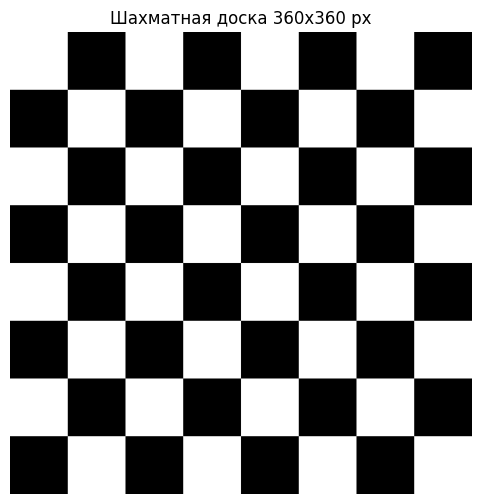

True

In [13]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

board = np.ones((360, 360, 3), dtype=np.uint8) * 255

for i in range(8):
    for j in range(8):
        if (i + j) % 2 == 1:  # Черная клетка
            board[i*45:(i+1)*45, j*45:(j+1)*45] = 0

plt.figure(figsize=(6, 6))
plt.imshow(board)
plt.axis('off')  # Убираем оси
plt.title('Шахматная доска 360x360 px')
plt.show()

# Сохраняем на всякий случай
cv2.imwrite('chess_board.png', cv2.cvtColor(board, cv2.COLOR_RGB2BGR))

# Задача 6

Продолжим работать с результатами задачи 5.

    С помощью библиотек NumPy и OpenCV добавьте на доску четыре шашки: две красного и две синего цвета. Центр фигуры (шашки) должен совпадать с центром клетки, размер шашки должен быть меньше размера клетки.
    Добавьте под доской надпись «Хорошему игроку всегда везёт.». Используйте метод putText из библиотеки OpenCV.

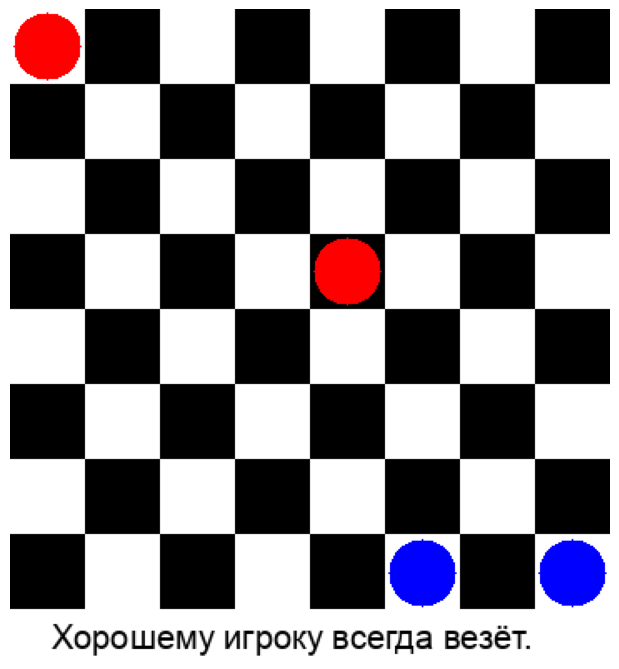

True

In [20]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw, ImageFont

# Создаем доску
board = np.ones((360, 360, 3), dtype=np.uint8) * 255

for i in range(8):
    for j in range(8):
        if (i + j) % 2 == 1:
            board[i*45:(i+1)*45, j*45:(j+1)*45] = 0

# Добавляем шашки
cv2.circle(board, (45//2, 45//2), 20, (255, 0, 0), -1)
cv2.circle(board, (45//2 + 45*4, 45//2 + 45*3), 20, (255, 0, 0), -1)
cv2.circle(board, (45//2 + 45*5, 360 - 45//2), 20, (0, 0, 255), -1)
cv2.circle(board, (45//2 + 45*7, 360 - 45//2), 20, (0, 0, 255), -1)

# Создаем изображение с текстом через PIL (работает с русским)
result = np.ones((390, 360, 3), dtype=np.uint8) * 255
result[:360, :] = board

# Конвертируем в PIL для русского текста
pil_img = Image.fromarray(result)
draw = ImageDraw.Draw(pil_img)

# Используем системный шрифт который поддерживает русский
try:
    font = ImageFont.truetype("arial.ttf", 20)
except:
    font = ImageFont.load_default()

# Добавляем русский текст
draw.text((25, 365), "Хорошему игроку всегда везёт.", fill=(0, 0, 0), font=font)

# Конвертируем обратно в numpy
result = np.array(pil_img)

# Показываем
plt.figure(figsize=(6, 6.5))
plt.imshow(result)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Сохраняем
cv2.imwrite('chess_with_checkers.png', cv2.cvtColor(result, cv2.COLOR_RGB2BGR))

# Задача 7

Используя библиотеку PyUSB, выведите список устройств, подключённых к вашему компьютеру.

In [22]:
pip install pyusb

     |████████████████████████████████| 58 kB 608 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [23]:
import usb.core

devices = usb.core.find(find_all=True)

for device in devices:
    print(f"USB устройство: {device}")

USB устройство: DEVICE ID 1d6b:0003 on Bus 004 Address 001 =================
 bLength                :   0x12 (18 bytes)
 bDescriptorType        :    0x1 Device
 bcdUSB                 :  0x310 USB 3.1
 bDeviceClass           :    0x9 Hub
 bDeviceSubClass        :    0x0
 bDeviceProtocol        :    0x3
 bMaxPacketSize0        :    0x9 (9 bytes)
 idVendor               : 0x1d6b
 idProduct              : 0x0003
 bcdDevice              :  0x515 Device 5.15
 iManufacturer          :    0x3 Error Accessing String
 iProduct               :    0x2 Error Accessing String
 iSerialNumber          :    0x1 Error Accessing String
 bNumConfigurations     :    0x1
  CONFIGURATION 1: 0 mA ====================================
   bLength              :    0x9 (9 bytes)
   bDescriptorType      :    0x2 Configuration
   wTotalLength         :   0x1f (31 bytes)
   bNumInterfaces       :    0x1
   bConfigurationValue  :    0x1
   iConfiguration       :    0x0 
   bmAttributes         :   0xe0 Self Powered

# Задача 8

У вас есть файл cities.html. Используя библиотеку BeautifulSoup4, подготовьте два pandas.DataFrame: в первом будет содержаться информация из таблицы с названиями городов, во втором — информация о населении этих городов.

In [40]:
from bs4 import BeautifulSoup
import pandas as pd

with open('Сities.html', 'r') as f:
    soup = BeautifulSoup(f, 'html.parser')

tables = soup.find_all('table')

df1 = pd.read_html(str(tables[0]))[0]
df2 = pd.read_html(str(tables[1]))[0]

print(df1)
print(df2)

      Город          Страна    Столица
0     Токио          Япония      Токио
1    Лондон  Великобритания     Лондон
2     Париж         Франция      Париж
3  Нью-Йорк             США  Вашингтон
4    Сидней       Австралия   Канберра
      Город      2021      2022      2023
0     Токио  37393000  37181000  36982000
1    Лондон   8982000   9000000   9015000
2     Париж   2148000   2135000   2123000
3  Нью-Йорк   8336817   8336817   8336817
4    Сидней   5367206   5413358   5459510
